# Natural Language Processing (NLP)

References:

* [Introduction to NLP in Python](https://campus.datacamp.com/courses/introduction-to-natural-language-processing-in-python/regular-expressions-word-tokenization)
* [Machine Learning with Python Cookbook](https://www.amazon.com/Machine-Learning-Python-Cookbook-Preprocessing/dp/1491989386)
* [Feature Engineering for NLP in Python](https://campus.datacamp.com/courses/feature-engineering-for-nlp-in-python)

In [63]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from gensim.corpora.dictionary import Dictionary
from gensim.models import TfidfModel
from collections import defaultdict 
import itertools
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textatistic import Textatistic
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

## Removing punctuation

In [222]:
import unicodedata
import sys

text = ["Yo! This is inspired by Chris Albon's 6.3 Removing Punctuation example.", "It's in his book linked above!"]

# sys.maxunicode is "An integer giving the largest supported code point for a Unicode character."
punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

# There are other ways to remove punction characters, but this method is very fast
[string.translate(punctuation) for string in text]

['Yo This is inspired by Chris Albons 63 Removing Punctuation example',
 'Its in his book linked above']

## Tokenize Words

### Using nltk

In [223]:
text = nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')[0:10000]

word_tokenize(text)[:10]

['[',
 'The',
 'Tragedie',
 'of',
 'Macbeth',
 'by',
 'William',
 'Shakespeare',
 '1603',
 ']']

### Using spaCy

In [224]:
nlp = spacy.load("en")
doc = nlp(text)
tokens = [token.text for token in doc]
tokens[:10]

['[',
 'The',
 'Tragedie',
 'of',
 'Macbeth',
 'by',
 'William',
 'Shakespeare',
 '1603',
 ']']

## Tokenize Sentences

In [225]:
sent_tokenize(text)[:10]

['[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus.',
 'Scoena Prima.',
 'Thunder and Lightning.',
 'Enter three Witches.',
 '1.',
 'When shall we three meet againe?',
 'In Thunder, Lightning, or in Raine?',
 '2.',
 "When the Hurley-burley's done,\nWhen the Battaile's lost, and wonne\n\n   3.",
 'That will be ere the set of Sunne\n\n   1.']

### Unique words

In [226]:
set(word_tokenize(text)[:10])

{'1603',
 'Macbeth',
 'Shakespeare',
 'The',
 'Tragedie',
 'William',
 '[',
 ']',
 'by',
 'of'}

## Tweet Tokenizer

In [227]:
tweet = 'IMO hashtags are #lame @mhmazur'
TweetTokenizer().tokenize(tweet)

['IMO', 'hashtags', 'are', '#lame', '@mhmazur']

## Charting token lengths

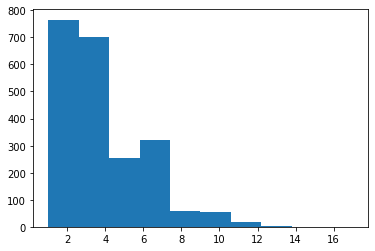

In [228]:
words = word_tokenize(text)
lengths = [len(word) for word in words]

plt.hist(lengths)
plt.show()

## Counting token frequencies

In [229]:
counter = Counter(word_tokenize(text)[:10])
counter

Counter({'[': 1,
         'The': 1,
         'Tragedie': 1,
         'of': 1,
         'Macbeth': 1,
         'by': 1,
         'William': 1,
         'Shakespeare': 1,
         '1603': 1,
         ']': 1})

## Identifying most common tokens

In [230]:
counter.most_common(5)

[('[', 1), ('The', 1), ('Tragedie', 1), ('of', 1), ('Macbeth', 1)]

## Removing stopwords

### Using nltk

In [250]:
# Note that isalpha will return false for words like "U.S.A." which may not be desireable
alpha_only = [token for token in word_tokenize(text.lower()) if token.isalpha()]
no_stops = [token for token in alpha_only if token not in stopwords.words('english')]
no_stops[:10]

['tragedie',
 'macbeth',
 'william',
 'shakespeare',
 'actus',
 'primus',
 'scoena',
 'prima',
 'thunder',
 'lightning']

In [232]:
Counter(no_stops).most_common(3)

[('king', 19), ('thane', 17), ('macbeth', 15)]

### Using spaCy

In [254]:
text = nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')[0:10000]

nlp = spacy.load("en")
doc = nlp(text)
tokens = [token.text.lower() for token in doc]

stop_words = spacy.lang.en.stop_words.STOP_WORDS
no_stops = [token for token in tokens if token.isalpha() and token not in stop_words]
no_stops[:10]

['tragedie',
 'macbeth',
 'william',
 'shakespeare',
 'actus',
 'primus',
 'scoena',
 'prima',
 'thunder',
 'lightning']

## Stemming

Stemming tries to convert words into their root forms by identifying and removing affies while keeping the root meaning of the word.

> Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. ([#](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html))

In [234]:
text = "I saw six bats flying through the sky"
tokenized_words = word_tokenize(text)

porter = PorterStemmer()

[porter.stem(word) for word in tokenized_words]

['I', 'saw', 'six', 'bat', 'fli', 'through', 'the', 'sky']

## Lemmatizer

> Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. ([#](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html))

### Using nltk

In [235]:
# TODO: Need to POS tag tokens first:
# https://stackoverflow.com/questions/32957895/wordnetlemmatizer-not-returning-the-right-lemma-unless-pos-is-explicit-python
wordnet_lemmatizer = WordNetLemmatizer()

[wordnet_lemmatizer.lemmatize(token) for token in tokenized_words]

['I', 'saw', 'six', 'bat', 'flying', 'through', 'the', 'sky']

In [236]:
Counter(lemmatized).most_common(3)

[('king', 22), ('thane', 17), ('macbeth', 15)]

### Using spaCy

In [237]:
nlp = spacy.load("en")
doc = nlp(text)
tokens = [token.lemma_ for token in doc]
tokens

['-PRON-', 'see', 'six', 'bat', 'fly', 'through', 'the', 'sky']

## Preprocessing using spaCy

via a [DataCamp exercise](https://campus.datacamp.com/courses/feature-engineering-for-nlp-in-python/text-preprocessing-pos-tagging-and-ner?ex=7)

In [285]:
nlp = spacy.load("en")

# spacy's stop_words contains words like "six" and "see" for some reason...
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def preprocess(text):
    doc = nlp(text, disable=['ner', 'parser'])
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stop_words]
    return ' '.join(a_lemmas)

df = pd.DataFrame({"text": ["I saw six bats flying through the sky"]})
df["preprocessed"] = df["text"].apply(preprocess)
display(df)

,text,preprocessed
0,I saw six bats flying through the sky,bat fly sky


# Gensim

In [238]:
raw = ["There is a cat near the cat", "There is a dog"]
articles = [word_tokenize(article.lower()) for article in raw]

dictionary = Dictionary(articles)
for index, article in enumerate(articles):
    print("\nArticle", str(index + 1) + ":")
    for token in article:
        print(" ", token + ":", dictionary.token2id.get(token))
    
corpus = [dictionary.doc2bow(article) for article in articles]

# First element of each tuple is the id of the token
# Second element is number of times it appears in the article
print("\nCorpus", corpus)

bow_doc = sorted(corpus[0], key=lambda w: w[1], reverse=True)
print("\nFirst doc sorted by occurrences:", bow_doc)

print("\nTop words in first doc:")
for word_id, word_count in bow_doc[:3]:
    print(" ", dictionary.get(word_id), word_count)
    
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

print("\nTotal word counts:")
print(total_word_count.items())

sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

print("\nTop 5 words across corpus:")
for word_id, word_count in sorted_word_count[:5]:
    print(" ", dictionary.get(word_id), word_count)


Article 1:
  there: 5
  is: 2
  a: 0
  cat: 1
  near: 3
  the: 4
  cat: 1

Article 2:
  there: 5
  is: 2
  a: 0
  dog: 6

Corpus [[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1)], [(0, 1), (2, 1), (5, 1), (6, 1)]]

First doc sorted by occurrences: [(1, 2), (0, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

Top words in first doc:
  cat 2
  a 1
  is 1

Total word counts:
dict_items([(0, 2), (1, 2), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1)])

Top 5 words across corpus:
  a 2
  cat 2
  is 2
  there 2
  near 1


## Gensim Tfidf

In [239]:
print("article:", raw[0])

doc = corpus[0]
print("\ndoc:", doc)

tfidf = TfidfModel(corpus)
tfidf_weights = tfidf[doc]
print("\ntfidf_weights:", tfidf_weights)

sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 2 weighted words
print("\nTop 2 terms:")
for term_id, weight in sorted_tfidf_weights[:2]:
    print(dictionary.get(term_id), weight)

article: There is a cat near the cat

doc: [(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1)]

tfidf_weights: [(1, 0.8164965809277261), (3, 0.4082482904638631), (4, 0.4082482904638631)]

Top 2 terms:
cat 0.8164965809277261
near 0.4082482904638631


# Name Entity Recognition

## Identifying parts of speech

* See [list of tags](https://pythonprogramming.net/part-of-speech-tagging-nltk-tutorial/) for what each acronym represents

In [4]:
sentences = ["John Gleen as an astronaut in NASA."]
parts_of_speech = [nltk.pos_tag(word_tokenize(sentence)) for sentence in sentences]
parts_of_speech

[[('John', 'NNP'),
  ('Gleen', 'NNP'),
  ('as', 'IN'),
  ('an', 'DT'),
  ('astronaut', 'NN'),
  ('in', 'IN'),
  ('NASA', 'NNP'),
  ('.', '.')]]

In [8]:
nlp = spacy.load("en")
doc = nlp(sentences[0])
tokens = [[token.text, token.pos_] for token in doc]
tokens[:10]

[['John', 'PROPN'],
 ['Gleen', 'PROPN'],
 ['as', 'SCONJ'],
 ['an', 'DET'],
 ['astronaut', 'NOUN'],
 ['in', 'ADP'],
 ['NASA', 'PROPN'],
 ['.', 'PUNCT']]

## Identifying Named Entities with nltk

Name Entities are people, organizations, etc

In [241]:
chunked_sentences = nltk.ne_chunk_sents(parts_of_speech, binary=True)

for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE John/NNP Gleen/NNP)
(NE NASA/NNP)


## Identifying Named Entities with spaCy

In [242]:
# Need to run `$ python3 -m spacy download en` beforehand
nlp = spacy.load("en", tagger=False, parser=False, matcher=False)

doc = nlp("John Gleen as an astronaut in NASA.")

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


PERSON John Gleen
ORG NASA


## Encoding text as a bag of words with Count Vectorizer

CountVectorizer will count how many times each word is in a string.

In [243]:
# stop_words="english" will remove stop words like "is" and "a" here
# It defaults to lowercasing all words. Lots of other params available too.
count_vectorizer = CountVectorizer(stop_words="english")

X = ["Sola runs", "Sola scratches Sola", "Sola chews toy dogs"]
X_transformed = count_vectorizer.fit_transform(X)

print("Feature Names:", count_vectorizer.get_feature_names())
print("\nVocabulary:", count_vectorizer.vocabulary_)

df = pd.DataFrame(X_transformed.todense(), columns=count_vectorizer.get_feature_names())
display(df)

Feature Names: ['chews', 'dogs', 'runs', 'scratches', 'sola', 'toy']

Vocabulary: {'sola': 4, 'runs': 2, 'scratches': 3, 'chews': 0, 'toy': 5, 'dogs': 1}


,chews,dogs,runs,scratches,sola,toy
0,0,0,1,0,1,0
1,0,0,0,1,2,0
2,1,1,0,0,1,1


## Identifying 1 and 2 grams

In [244]:
count_vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 2))

X = ["Sola runs", "Sola scratches Sola", "Sola chews toy dogs"]
X_transformed = count_vectorizer.fit_transform(X)

print("Feature Names:", count_vectorizer.get_feature_names())
print("\nVocabulary:", count_vectorizer.vocabulary_)

df = pd.DataFrame(X_transformed.todense(), columns=count_vectorizer.get_feature_names())
display(df)

Feature Names: ['chews', 'chews toy', 'dogs', 'runs', 'scratches', 'scratches sola', 'sola', 'sola chews', 'sola runs', 'sola scratches', 'toy', 'toy dogs']

Vocabulary: {'sola': 6, 'runs': 3, 'sola runs': 8, 'scratches': 4, 'sola scratches': 9, 'scratches sola': 5, 'chews': 0, 'toy': 10, 'dogs': 2, 'sola chews': 7, 'chews toy': 1, 'toy dogs': 11}


,chews,chews toy,dogs,runs,scratches,scratches sola,sola,sola chews,sola runs,sola scratches,toy,toy dogs
0,0,0,0,1,0,0,1,0,1,0,0,0
1,0,0,0,0,1,1,2,0,0,1,0,0
2,1,1,1,0,0,0,1,1,0,0,1,1


## Supervised Learning

In [10]:
imdb = pd.read_csv("data/IMDB Dataset.csv")

X = imdb["review"]
y = imdb["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Using CountVectorizer

In [17]:
count_vectorizer = CountVectorizer(stop_words="english")

X_train_transformed = count_vectorizer.fit_transform(X_train)
X_test_transformed = count_vectorizer.transform(X_test)

print("First 10 features:", count_vectorizer.get_feature_names()[:10])

print("Train shape:", X_train_transformed.shape)
print("Train shape:", X_test_transformed.shape)

nb = MultinomialNB()
nb.fit(X_train_transformed, y_train)
print("Score: {:.2f}".format(nb.score(X_test_transformed, y_test)))

First 10 features: ['00', '000', '00000000000', '0000000000001', '00001', '00015', '000dm', '001', '003830', '0069']
Train shape: (35000, 88028)
Train shape: (15000, 88028)
Score: 0.86


### Using TfidfVectorizer

See TF-IDF notebook for more in depth examples.

In [19]:
# max_df: "When building the vocabulary ignore terms that have a document frequency strictly higher than 
# the given threshold (corpus-specific stop words). If float in range [0.0, 1.0], the parameter represents 
# a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None."
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

print("First 10 features:", tfidf_vectorizer.get_feature_names()[:10])

nb = MultinomialNB()
nb.fit(X_train_transformed, y_train)
print("Score: {:.2f}".format(nb.score(X_test_transformed, y_test)))

First 10 features: ['00', '000', '00000000000', '0000000000001', '00001', '00015', '000dm', '001', '003830', '0069']
Score: 0.87


## Cosine Similarity

0-1 score where 1 = exact same words in document, 0 = none of the same word

In [70]:
corpus = ["There is a dog", "There is a cat", "A cat chases a frog"]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())
display(df)

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("Cosine similarity matrix:\n\n", cosine_sim)

# Notice how both linear_kernel and cosine_similarity produced the same result. 
# However, linear_kernel took a smaller amount of time to execute. When you're 
# working with a very large amount of data and your vectors are in the tf-idf 
# representation, it is good practice to default to linear_kernel to improve performance.
# via https://campus.datacamp.com/courses/feature-engineering-for-nlp-in-python/tf-idf-and-similarity-scores?ex=9
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("\nLinear kernel:\n\n", cosine_sim)

,cat,chases,dog,frog,is,there
0,0.00000,0.000000,0.680919,0.000000,0.517856,0.517856
1,0.57735,0.000000,0.000000,0.000000,0.577350,0.577350
2,0.47363,0.622766,0.000000,0.622766,0.000000,0.000000


Cosine similarity matrix:

 [[1.         0.59796874 0.        ]
 [0.59796874 1.         0.27345018]
 [0.         0.27345018 1.        ]]

Linear kernel:

 [[1.         0.59796874 0.        ]
 [0.59796874 1.         0.27345018]
 [0.         0.27345018 1.        ]]


## Generating a list of similar items

In [110]:
series = pd.Series(corpus)
indices = pd.Series(series.index, index=series)
scores = cosine_sim[indices["There is a cat"]]

n = 2

# Figure out the indices that would sort smallest to largest, then reverse that list,
# and grab top top n items excluding the first item (which will always be 1 because it's
# the cosine similarity to itself)
top_similar_scores_indices = list(scores.argsort()[::-1][1:n+1])
list(series[top_similar_scores_indices])

['There is a dog', 'A cat chases a frog']

## Comparing two documents

In [111]:
# This has to be downloaded separately:
# python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')

doc1 = nlp("The cat ran")
doc2 = nlp("The dog ran")

doc1.similarity(doc2)

<ipython-input-111-fcd63f262692>:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  doc1.similarity(doc2)


0.8750411709609652

## Readability Score

In [14]:
nb = MultinomialNB()
nb.fit(X_train_transformed, y_train)
nb.score(X_test_transformed, y_test)

0.8572666666666666

In [248]:
# If you get `division by zero` error it means the text isn't long enough
text = "\nThe gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the stone would fall back of its own weight. They had thought with some reason that there is no more dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most prudent of mortals. According to another tradition, however, he was disposed to practice the profession of highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. He was punished for this in the underworld. Homer tells us also that Sisyphus had put Death in chains. Pluto could not endure the sight of his deserted, silent empire. He dispatched the god of war, who liberated Death from the hands of her conqueror. It is said that Sisyphus, being near to death, rashly wanted to test his wife\'s love. He ordered her to cast his unburied body into the middle of the public square. Sisyphus woke up in the underworld. "

scores = Textatistic(text).scores
scores

{'flesch_score': 78.55659919028342,
 'fleschkincaid_score': 5.531821862348178,
 'gunningfog_score': 7.7910931174089075,
 'smog_score': 8.371475516178862,
 'dalechall_score': 7.861219028340081}